# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/Salaries.csv')

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [ ]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [ ]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [ ]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [ ]:
# Mean of all salaries
df.mean()


Unnamed: 0          199.000000
yrs.since.phd        22.314861
yrs.service          17.614610
salary           113706.458438
dtype: float64

In [ ]:
# Median of all salaries
df.median()

Unnamed: 0          199.0
yrs.since.phd        21.0
yrs.service          16.0
salary           107300.0
dtype: float64

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [ ]:
sex_salary_df = df[['sex','salary']] 
sex_salary_df.head()

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500


Finding the Median salary for all males

In [ ]:
#gender_sex = sex_salary_df['sex'].head()
male_median = sex_salary_df[sex_salary_df['sex'] == 'Male'].median()
print(male_median)

salary    108043.0
dtype: float64


In [ ]:
sex_salary_df.groupby(['sex']).median()

,salary
sex,
Female,103750
Male,108043


Finding the Median salary for all females

In [ ]:
female_median = sex_salary_df[sex_salary_df['sex'] == 'Female'].median()
print(female_median)

salary    103750.0
dtype: float64


In [ ]:
sex_salary_df.groupby(['sex']).median()

,salary
sex,
Female,103750
Male,108043


Comparing the Mean salary of Males and Females

In [ ]:
male_mean = sex_salary_df[sex_salary_df['sex'] == 'Male'].mean()
print(male_mean)

female_mean = sex_salary_df[sex_salary_df['sex'] == 'Female'].mean()
print(female_mean)


salary    115090.418994
dtype: float64
salary    101002.410256
dtype: float64


In [ ]:
# The difference between mean salaries of male and female
#Males have a higher mean salary 


# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [ ]:
experience = df[['yrs.service','salary', 'sex']] 

twenty_years = experience[experience['yrs.service'] == 20]

twenty_years



,yrs.service,salary,sex
8,20,119250,Male
16,20,101000,Male
82,20,144640,Male
94,20,123683,Male
173,20,134185,Male
209,20,163200,Male
223,20,129600,Male
225,20,122400,Male
353,20,138000,Male
371,20,110515,Male


In [ ]:
twenty_years.mean()

yrs.service        20.0
salary         128647.3
dtype: float64

Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [ ]:
less_than_twenty_years = experience[experience['yrs.service'] < 20]
less_than_twenty_years

,yrs.service,salary,sex
0,18,139750,Male
1,16,173200,Male
2,3,79750,Male
5,6,97000,Male
9,18,129000,Female
...,...,...,...
390,19,166605,Male
391,19,151292,Male
393,19,150564,Male
395,15,95329,Male


In [ ]:
less_than_twenty_years.mean()

yrs.service         8.820833
salary         107940.504167
dtype: float64

In [ ]:
#The salary is higher for people who have more years of experience but they are both high.

People who have salary of greater than or equal to 200,000

In [ ]:
greater_than_200000 = df[df['salary'] >= 200000]
greater_than_200000

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
43,44,Prof,B,38,38,Male,231545
249,250,Prof,A,29,7,Male,204000
364,365,Prof,A,43,43,Male,205500


Your Findings here...

Only 3 people had salaries greater than or equal to 200,000, they were all male and two out of three had over 20 years of experience. They are also all professors. 

# Rename values, subset columns, etc

In [ ]:
df.head()


,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [ ]:
df.rename(columns={'Unnamed: 0': 'ID', 'yrs.service': 'yrs_of_service', 'yrs.since.phd': 'yrs_since_phd'}, inplace=True)
df

,ID,rank,discipline,yrs_since_phd,yrs_of_service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


# Create some simple visualizations showing some simple statistics

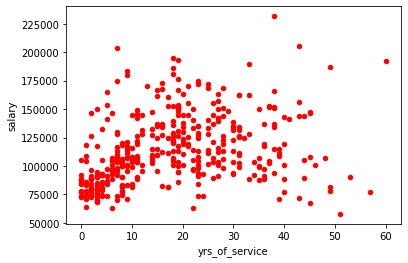

In [ ]:
df.plot(kind='scatter',x='yrs_of_service',y='salary',color='red')
plt.show()

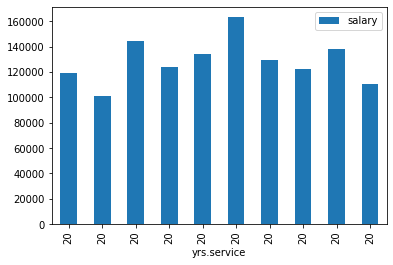

In [ ]:
#People with 20 years of experience 
twenty_years.plot(kind='bar',x='yrs.service',y='salary')

plt.show()


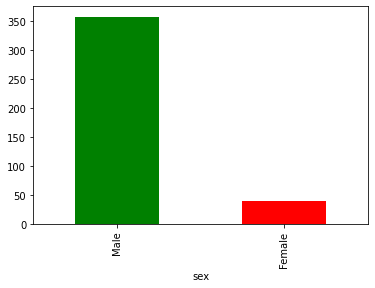

In [ ]:
df = df.groupby(['sex'])['salary'].count().sort_values(ascending=False)
df.plot(kind='bar', color=['green', 'red'])

Your observations from the visuals: 

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

Your Findings here...
People with 20 years of experience have an mean salary of 128,647 vs people with less than 20 have 107,940. There were only 3 people with salaries over 200000. 



I also discovered that the -

Most slaries started off small and increased as years of experience increased. I also noticed that Males had a higher mean salary compared to females. 



